<a href="https://colab.research.google.com/github/Yulianagalvis/Se-ales-y-sistemas/blob/main/Simulaci%C3%B3n_densidad_espectral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ingresa el valor de la amplitud A: 4
Ingresa el valor de la duración del pulso tau (en segundos): 4


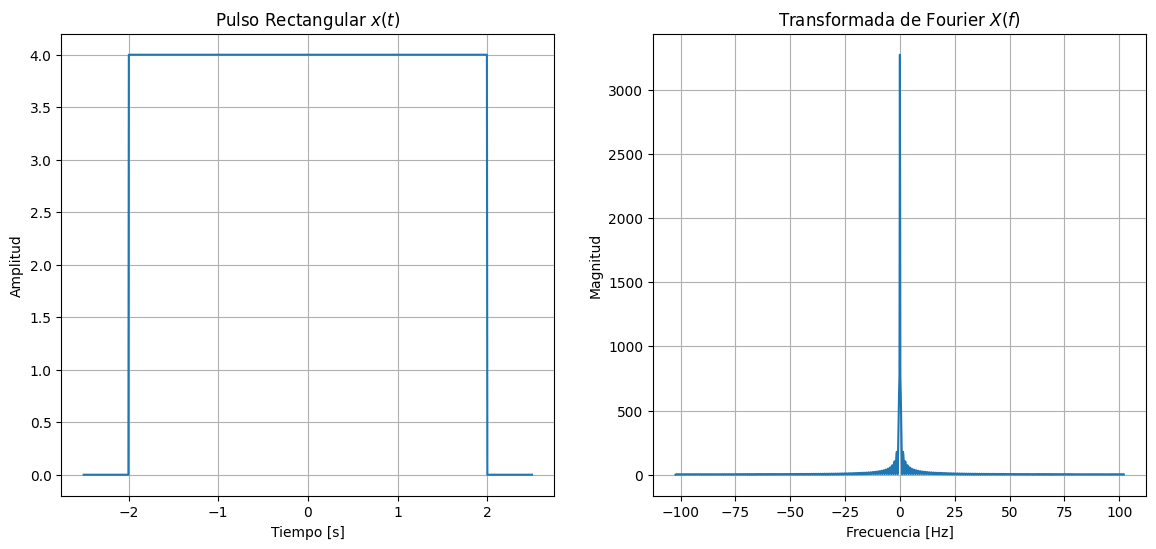

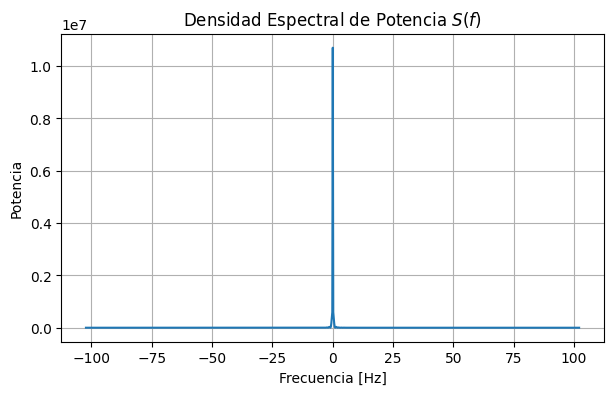

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Función que define el pulso rectangular
def rect_pulse(t, tau, A=1):
    return A * np.where(np.abs(t) <= tau/2, 1, 0)

# Solicitar al usuario que ingrese los valores de A y tau
A = float(input("Ingresa el valor de la amplitud A: "))
tau = float(input("Ingresa el valor de la duración del pulso tau (en segundos): "))

# Otros parámetros
T = 5.0  # Duración total del tiempo de simulación (debe ser mayor que tau)
N = 1024  # Número de puntos (resolución de la señal)

# Crear vector de tiempo
t = np.linspace(-T/2, T/2, N)

# Crear la señal rectangular
x_t = rect_pulse(t, tau, A)

# Calcular la transformada de Fourier utilizando fft
X_f = fft(x_t)
# Calcular las frecuencias correspondientes
f = fftfreq(N, d=(t[1] - t[0]))

# Centrar la transformada para visualización
X_f_shifted = np.fft.fftshift(X_f)
f_shifted = np.fft.fftshift(f)

# Densidad espectral de potencia (magnitud al cuadrado)
S_f = np.abs(X_f_shifted)**2

# Gráfica de la señal en el dominio del tiempo
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(t, x_t)
plt.title('Pulso Rectangular $x(t)$')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()

# Gráfica de la Transformada de Fourier (dominio de la frecuencia)
plt.subplot(1, 2, 2)
plt.plot(f_shifted, np.abs(X_f_shifted))
plt.title('Transformada de Fourier $X(f)$')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid()

plt.show()

# Gráfica de la densidad espectral de potencia
plt.figure(figsize=(7, 4))
plt.plot(f_shifted, S_f)
plt.title('Densidad Espectral de Potencia $S(f)$')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Potencia')
plt.grid()

plt.show()